# <font color=FF3300>Calcul avec la directivité des sources</font>

On récupère comprenant une source et un récépteur surfacique. On va ajouter des Sources avec des directivités différentes et on visualisera sur une représentation 2D.
On suivra les étapes suivantes:
* Initialisation
* Récupération du projet
* Ajout des sources
* Calcul du résultat
* Visualisation

### <font color=FF3300> Initialisation </font>
On importe les différentes parties propres à TYMPAN le <font color='9900CC'>Projet</font>, le <font color='9900CC'>Model</font> et le <font color='9900CC'>Solver</font> mais aussi les outils comme Point3D, Spectrum, Source ou Directivity

In [1]:
from tympan.models.project import Project
from tympan.models.solver import Model, Solver, Source, Spectrum
from tympan.models._solver import Directivity
chemin_proj = r'Projet_directivite.xml'

On importe les modules nécéssaires au calcul et à la visualisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt;
import matplotlib.colors as colors
from pylab import cm, imshow, show, figure

### <font color=FF3300> Récupération du projet </font>

On récupère le projet depuis un fichier xml (les récépteur surfacique ne peuvent pas être crée depuis l'API) le projet contient un récépteur surfacique et une source au milieu du récépteur. On récupère aussi le spectre et la position de la source

In [3]:
my_project = Project.from_xml(chemin_proj,verbose=True)
my_model = Model.from_project(my_project, set_sources=True)
my_solver = Solver.from_project(my_project,verbose=True)
source = my_model.sources[0]
posx,posy,posz = source.position.x, source.position.y, source.position.z
spec = source.spectrum.to_dB()

D:\Tympan_exe\TYMPAN_exe\cython_d\tympan\altimetry\builder.py:71: RuntimeWarning: main site landtake (or surrounding level curve) does not appear to be closed; closing it for altimetry processing
  RuntimeWarning)


### <font color=FF3300> Ajout des sources </font>
On ajoute 4 sources avec des diréctivités différentes (les diréctivités sont de type ```chimney``` orienté vers les 4 points cardinaux.
* ```python
vectors #Contient les vecteurs vers les point cardinaux ```
* ```python
Directivity('chimney',vectors[i],5) #On crée un objet Directivity, une directivité de type chimney orienté vers vectors[i] de taille 5 ```

In [4]:
vectors = [[1,0,0],[0,1,0],[-1,0,0],[0,-1,0]]
for i in range(4):
    directivity = Directivity('chimney',vectors[i],5)
    source = Source((posx,posy,posz),spec, directivity)
    my_model.add_source(source)

### <font color=FF3300>Calcul du résultat</font>
On calcul le résultat acoustique puis on récupère la valeur globale sur chaque récépteur du récépteur surfacique pour pouvoir déssiner la carto.

In [5]:
resu = my_solver.solve(my_model)
resultat = []
for id_r in range(my_model.nreceptors):
    tab_rec = np.zeros(31,)
    for id_s in range(my_model.nsources):
        tab_rec += resu.spectrum(id_r,id_s).values
    resultat.append(Spectrum(10*np.log10(tab_rec/4e-10)).dBA)

X = [rec.position.x for rec in my_model.receptors]
Y = [rec.position.y for rec in my_model.receptors]

### <font color=FF3300> Visualisation </font>
On crée une visualisation 2D avec la valeur globale sur chaque récépteur du récépteur surfacique

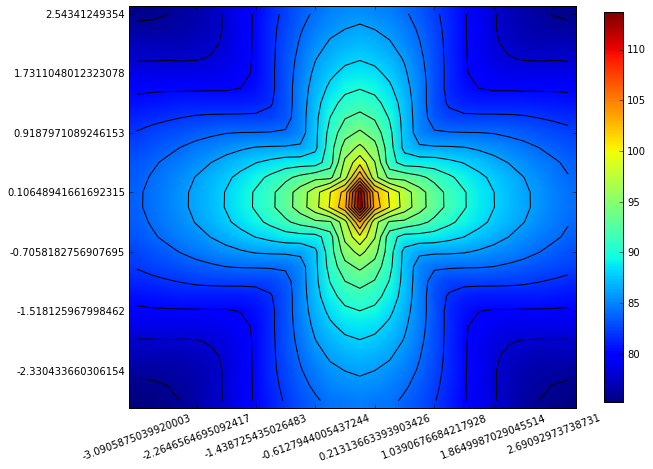

In [6]:
fig = plt.figure(figsize=(10,20))
axx = list(set(X))
axx.sort()
axy = list(set(Y))
axy.sort()
taille = np.meshgrid(axx,axy)[0].shape
resultat = np.reshape(resultat,taille)
plt.xticks(range(0,len(X),4),axx[::4],rotation=20)
plt.yticks(range(0,len(Y),4),axy[::-4])
plt.imshow(resultat)
plt.colorbar(shrink = 0.35)
plt.contour(resultat,20,colors='black')

plt.show()